# Ətraflı Kəşfiyyat Məlumat Təhlili (Exploratory Data Analysis - EDA)

# Kredit Satışı Məlumatlarının Dərin Təhlili

---

## 🎯 Bu dəftərdə nə öyrənəcəyik?

Bu dəftər sizə **məlumat elminin əsas daşlarını** öyrədəcək. Sadəcə rəqəmlərə baxmaq deyil, **məlumatların arxasındakı hekayəni** başa düşməyi öyrənəcəksiniz.

### 📚 Öyrənəcəyimiz əsas konsepsiyalar:

1. **Mərkəzi Tendenсiya (Central Tendency)**
   - Ortalama, Median, Mod
   - Hər birini nə vaxt istifadə etməli?
   - Nə üçün vacibdir?

2. **Dispersiya və Yayılma (Dispersion & Spread)**
   - Standart sapma, Variasiya əmsalı
   - Məlumatların dəyişkənliyini necə ölçürük?

3. **Paylanma (Distribution)**
   - Normal paylanma nədir?
   - Skewness (əyrilik) və Kurtosis (sivrilik)
   - Məlumatlarımız necə paylanıb?

4. **Outlier-lər (Kənar Dəyərlər)**
   - Nə vaxt outlier problemdir?
   - Necə aşkar edirik? (IQR, Z-score)
   - Necə müalicə edirik?

5. **Korrelyasiya (Correlation)**
   - Dəyişənlər arasında əlaqə
   - Korrelyasiya ≠ Səbəbiyyət!
   - Multicollinearity problemi

6. **Zaman Seriyası Xüsusiyyətləri**
   - Trend, Mövsümilik, Tsikl
   - Stasionarlıq nədir?
   - Avtokorelasiya

7. **Dəyişənlər Arası Əlaqələr**
   - Scatter plots
   - Pair plots
   - Feature importance

---

## 🎓 Fəlsəfə: Niyə EDA vacibdir?

> **"Məlumatları başa düşmədən model qurmaq, xəritəsiz səyahət etmək kimidir."**

EDA bizə:
- ✅ Məlumatların keyfiyyətini yoxlamağa imkan verir
- ✅ Gizli nümunələri və əlaqələri aşkar edir
- ✅ Outlier-ləri və anomaliyaları tapır
- ✅ Model seçiminə yardım edir
- ✅ Fərziyyələrimizi yoxlayır

**İndi başlayaq! 🚀**

---

# Bölüm 1️⃣: Hazırlıq - Alətlərimizi Yığaq

## Kitabxanalar nədir?

Kitabxanalar hazır alətlər dəstidir. Təkəri yenidən icad etməyə ehtiyac yoxdur!

- **pandas**: Məlumat manipulyasiyası (Excel kimi, amma daha güclü)
- **numpy**: Riyazi əməliyyatlar və massivlər
- **matplotlib & seaborn**: Vizualizasiya (gözəl qrafiklər)
- **scipy**: Statistik testlər və elmi hesablamalar
- **statsmodels**: İqtisadi və statistik modellər

In [1]:
# Əsas məlumat emalı kitabxanaları
import pandas as pd
import numpy as np

# Vizualizasiya
import matplotlib.pyplot as plt
import seaborn as sns

# Statistik testlər və təhlil
from scipy import stats
from scipy.stats import normaltest, skew, kurtosis, shapiro
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Xəbərdarlıqları gizlət (təmiz output üçün)
import warnings
warnings.filterwarnings('ignore')

# Qrafik parametrləri - gözəl görünüş üçün
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

# Tarix
from datetime import datetime

print("✅ Bütün alətlər yükləndi!")
print(f"📅 Təhlil tarixi: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("\n🎬 EDA səyahətimizə xoş gəlmisiniz!")

✅ Bütün alətlər yükləndi!
📅 Təhlil tarixi: 2025-11-03 08:26:21

🎬 EDA səyahətimizə xoş gəlmisiniz!


---

# Bölüm 2️⃣: Məlumatların Yüklənməsi və İlk Baxış

## İlk addım: Məlumatlarla tanış olaq

Məlumatları yükləyərkən özümüzə bu sualları verməliyik:

1. **Neçə müşahidə var?** (Sətir sayı)
2. **Neçə dəyişən var?** (Sütun sayı)
3. **Hansı tip məlumatlar var?** (Rəqəmsal, kateqorik, tarix)
4. **Boş dəyərlər varmı?** (Missing values)
5. **Məlumatlar düzgünmü?** (Data quality)

In [2]:
# Məlumatları yüklə
df = pd.read_csv('data/ml_ready_data.csv')

print("=" * 90)
print("📊 MƏLUMAT HAQQINDA İLK İNFORMASİYA")
print("=" * 90)

print(f"\n📏 Ölçü: {df.shape[0]} müşahidə (sətir) × {df.shape[1]} dəyişən (sütun)")
print(f"📅 Dövr: {df['Rüblər'].iloc[0]} → {df['Rüblər'].iloc[-1]}")
print(f"📆 İllər: {df['Year'].min()} - {df['Year'].max()}")

print("\n📋 Sütunlar və növləri:")
print("-" * 90)
for col in df.columns:
    dtype = df[col].dtype
    non_null = df[col].notna().sum()
    null_count = df[col].isna().sum()
    print(f"  • {col:<40} | Növ: {str(dtype):<10} | Dolu: {non_null:2d} | Boş: {null_count:2d}")

print("\n" + "=" * 90)
print("\n🔍 İlk 5 sətirə baxaq (məlumatların necə göründüyünü görək):")
print("-" * 90)
df.head()

📊 MƏLUMAT HAQQINDA İLK İNFORMASİYA

📏 Ölçü: 22 müşahidə (sətir) × 29 dəyişən (sütun)
📅 Dövr: 2020 I → 2025 II
📆 İllər: 2020 - 2025

📋 Sütunlar və növləri:
------------------------------------------------------------------------------------------
  • Rüblər                                   | Növ: object     | Dolu: 22 | Boş:  0
  • Year                                     | Növ: int64      | Dolu: 22 | Boş:  0
  • Quarter                                  | Növ: int64      | Dolu: 22 | Boş:  0
  • Time_Index                               | Növ: int64      | Dolu: 22 | Boş:  0
  • Nağd_pul_kredit_satışı                   | Növ: float64    | Dolu: 22 | Boş:  0
  • GDP                                      | Növ: float64    | Dolu: 22 | Boş:  0
  • Dövlət_Gəlirləri                         | Növ: float64    | Dolu: 22 | Boş:  0
  • Dövlət_Xərcləri                          | Növ: float64    | Dolu: 22 | Boş:  0
  • Əhalinin_nominal_gəlirləri               | Növ: float64    | Dolu: 22 | Boş:  

,Rüblər,Year,Quarter,Time_Index,Nağd_pul_kredit_satışı,GDP,Dövlət_Gəlirləri,Dövlət_Xərcləri,Əhalinin_nominal_gəlirləri,Əhalinin_banklardakı_əmanətləri,...,Mənzil_qiymətləri,Müştərilərə_verilmiş_kreditlər,NPLs,ROA,ROE,Net_Interest_Margin,Efficiency_Ratio,Loan-to-Deposit_Ratio,Müştəri_sayı,Uçot_faiz_dərəcəsi
0,2020 I,2020,1,0,46642.84149,17928100.0,7810900.0,5254800.0,13442500.0,8251700.0,...,1.223936,359233.76244,25.853674,0.461758,2.968748,2.434258,76.900971,130.689125,25304.0,7.25
1,2020 II,2020,2,1,15709.38447,16450600.0,4211800.0,6476000.0,13935300.0,7706400.0,...,1.223569,349405.74088,37.211278,1.425385,7.770286,2.654720,71.419429,131.643899,16316.0,7.00
2,2020 III,2020,3,2,51257.54777,17965600.0,5941800.0,6911300.0,14231200.0,7834300.0,...,1.223447,366496.28305,37.871298,2.184751,11.813249,2.728564,71.328907,135.494827,32598.0,6.50
3,2020 IV,2020,4,3,26391.99772,20233800.0,6708600.0,7775000.0,14117100.0,8177900.0,...,1.223569,337946.33647,26.704039,3.094270,16.588028,2.626730,73.658537,123.697777,28564.0,6.25
4,2021 I,2021,1,4,53293.77411,19181900.0,5736400.0,5523700.0,13455900.0,8147500.0,...,1.247429,355393.13544,39.606834,0.950778,5.080284,2.588275,71.084181,125.430526,39842.0,6.25


### 💡 Bu nəticələrdən nə öyrənirik?

- **Müşahidə sayı**: Az məlumat varsa, mürəkkəb modellər işləməyə bilər
- **Boş dəyərlər**: Boş dəyərlər varsa, onları doldurmaq və ya silmək lazımdır
- **Məlumat növləri**: Düzgün növdə olmalı (məs. tarixlər datetime, rəqəmlər numeric)

**Növbəti addım:** Məlumatların son 5 sətirinə də baxaq!

In [3]:
print("🔍 Son 5 sətir (ən son məlumatlar):")
print("-" * 90)
display(df.tail())

print("\n💡 Niyə son sətirə baxırıq?")
print("   • Məlumat daxil edilməsində xəta varmı yoxlamaq üçün")
print("   • Ən son dövr məlumatlarının tam olduğunu təsdiqləmək üçün")
print("   • Trend və dəyişiklikləri görmək üçün")

🔍 Son 5 sətir (ən son məlumatlar):
------------------------------------------------------------------------------------------


,Rüblər,Year,Quarter,Time_Index,Nağd_pul_kredit_satışı,GDP,Dövlət_Gəlirləri,Dövlət_Xərcləri,Əhalinin_nominal_gəlirləri,Əhalinin_banklardakı_əmanətləri,...,Mənzil_qiymətləri,Müştərilərə_verilmiş_kreditlər,NPLs,ROA,ROE,Net_Interest_Margin,Efficiency_Ratio,Loan-to-Deposit_Ratio,Müştəri_sayı,Uçot_faiz_dərəcəsi
17,2024 II,2024,2,17,115337.48200,30423600.0,9608600.0,7639500.0,20473100.0,14180700.0,...,1.586013,712667.61041,16.226822,1.157529,7.863605,2.506293,74.520090,112.544068,198624.0,7.250
18,2024 III,2024,3,18,126285.41380,33309100.0,8894100.0,9121900.0,21705800.0,14164000.0,...,1.645647,750604.12689,20.050514,2.178904,13.383431,2.837377,72.619430,120.912659,224272.0,7.250
19,2024 IV,2024,4,19,110883.18507,33507500.0,9427200.0,12545700.0,21506400.0,14661900.0,...,1.699954,760424.19000,17.582014,2.775522,16.655025,2.798230,73.290120,119.026731,250864.0,7.250
20,2025 I,2025,1,20,93983.08141,29892900.0,9733400.0,8115000.0,20690700.0,15074000.0,...,1.775092,777043.67135,23.714640,0.710740,4.381524,2.549964,67.972724,116.448708,245777.0,7.250
21,2025 II,2025,2,21,29173.98404,32185300.0,10070500.0,8980600.0,22057100.0,15437000.0,...,1.794618,817018.92578,26.273902,1.352711,8.924951,2.478419,68.642427,114.446299,252200.0,7.125



💡 Niyə son sətirə baxırıq?
   • Məlumat daxil edilməsində xəta varmı yoxlamaq üçün
   • Ən son dövr məlumatlarının tam olduğunu təsdiqləmək üçün
   • Trend və dəyişiklikləri görmək üçün


---

# Bölüm 3️⃣: Təsviri Statistika (Descriptive Statistics)

## Təsviri statistika nədir?

Təsviri statistika məlumatları **xülasə edən və təsvir edən** rəqəmlərdir.

### 📊 Əsas göstəricilər:

1. **Count (Say)**: Neçə müşahidə var?
2. **Mean (Ortalama)**: Bütün dəyərlərin cəmini sayına bölürük
   - **Nə vaxt istifadə edək?** Normal paylanmış məlumatlar üçün
   - **Zəif tərəfi:** Outlier-lərə həssasdır

3. **Median (Mediana)**: Orta dəyər (50% müşahidə aşağıda, 50% yuxarıda)
   - **Nə vaxt istifadə edək?** Outlier-lər olduqda
   - **Güclü tərəfi:** Outlier-lərə davamlıdır

4. **Std (Standart Sapma)**: Məlumatların ortalamadan nə qədər uzaqlaşdığı
   - Kiçik std = məlumatlar yığcam
   - Böyük std = məlumatlar səpələnmiş

5. **Min/Max**: Ən kiçik və ən böyük dəyərlər
6. **25%, 50%, 75% (Quartiles)**: Məlumatların 4 hissəyə bölünməsi

In [4]:
print("=" * 90)
print("📊 TƏSVİRİ STATİSTİKA - RƏQƏMSAL DƏYİŞƏNLƏR")
print("=" * 90)

# Rəqəmsal sütunları seç
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Təsviri statistika
desc_stats = df[numeric_cols].describe()

print("\n📋 Ətraflı statistik xülasə:\n")
display(desc_stats.round(2))

print("\n" + "=" * 90)
print("\n💡 BU CƏDVƏLİ NECƏ OXUMALI?")
print("-" * 90)
print("\n🔹 Count (Say):")
print("   Hər dəyişən üçün neçə müşahidə var.")
print("   Əgər count < ümumi sətir sayı ise, boş dəyərlər var deməkdir.")

print("\n🔹 Mean (Ortalama) vs Median:")
print("   • Əgər Mean ≈ Median ise → Simmetrik paylanma (yaxşı!)")
print("   • Əgər Mean > Median ise → Sağa əyilmiş (positive skew)")
print("   • Əgər Mean < Median ise → Sola əyilmiş (negative skew)")

print("\n🔹 Std (Standart Sapma):")
print("   Məlumatların yayılmasını göstərir.")
print("   • Kiçik std: Məlumatlar ortalamanın ətrafında sıx")
print("   • Böyük std: Məlumatlar çox dəyişir, yayılmış")

print("\n🔹 25%, 50%, 75% (Quartiles):")
print("   Məlumatları 4 bərabər hissəyə bölür.")
print("   • Q1 (25%): Məlumatların 25%-i bundan kiçikdir")
print("   • Q2 (50%): Median (orta dəyər)")
print("   • Q3 (75%): Məlumatların 75%-i bundan kiçikdir")
print("   • IQR = Q3 - Q1: Məlumatların orta 50%-nin yayılması")

print("\n" + "=" * 90)

📊 TƏSVİRİ STATİSTİKA - RƏQƏMSAL DƏYİŞƏNLƏR

📋 Ətraflı statistik xülasə:



,Year,Quarter,Time_Index,Nağd_pul_kredit_satışı,GDP,Dövlət_Gəlirləri,Dövlət_Xərcləri,Əhalinin_nominal_gəlirləri,Əhalinin_banklardakı_əmanətləri,Orta_aylıq_əməkhaqqı,...,Mənzil_qiymətləri,Müştərilərə_verilmiş_kreditlər,NPLs,ROA,ROE,Net_Interest_Margin,Efficiency_Ratio,Loan-to-Deposit_Ratio,Müştəri_sayı,Uçot_faiz_dərəcəsi
count,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,...,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00
mean,2022.27,2.41,10.50,80612.82,27773990.91,7922531.82,8050509.09,17532436.36,11254740.91,0.86,...,1.42,545491.35,23.53,2.32,13.22,2.77,68.83,128.38,98817.18,7.38
std,1.64,1.14,6.49,32218.08,6159270.64,1975581.35,2187490.12,3021765.58,2616223.06,0.13,...,0.19,161794.36,9.82,1.37,7.54,0.26,4.95,11.45,80666.14,0.81
min,2020.00,1.00,0.00,15709.38,16450600.00,4211800.00,5254800.00,13442500.00,7706400.00,0.71,...,1.22,337946.34,13.57,0.38,2.46,2.38,59.26,107.09,16316.00,6.25
25%,2021.00,1.25,5.25,57808.22,21967675.00,6624900.00,6498750.00,14341150.00,8536075.00,0.73,...,1.27,394840.86,16.28,1.31,7.79,2.58,66.19,119.50,48889.00,7.03
50%,2022.00,2.00,10.50,85484.73,30014250.00,8003450.00,7586800.00,17977450.00,11484350.00,0.83,...,1.37,554731.97,18.82,2.16,12.44,2.73,68.40,129.55,60396.00,7.25
75%,2023.75,3.00,15.75,104791.65,32191075.00,9149250.00,9086575.00,20118375.00,13099825.00,0.97,...,1.54,666780.67,26.60,3.07,17.77,2.92,73.00,135.01,132162.25,7.69
max,2025.00,4.00,21.00,126285.41,35748000.00,13497800.00,13244000.00,22057100.00,15437000.00,1.10,...,1.79,817018.93,42.22,5.26,30.01,3.28,76.90,150.77,252200.00,9.00




💡 BU CƏDVƏLİ NECƏ OXUMALI?
------------------------------------------------------------------------------------------

🔹 Count (Say):
   Hər dəyişən üçün neçə müşahidə var.
   Əgər count < ümumi sətir sayı ise, boş dəyərlər var deməkdir.

🔹 Mean (Ortalama) vs Median:
   • Əgər Mean ≈ Median ise → Simmetrik paylanma (yaxşı!)
   • Əgər Mean > Median ise → Sağa əyilmiş (positive skew)
   • Əgər Mean < Median ise → Sola əyilmiş (negative skew)

🔹 Std (Standart Sapma):
   Məlumatların yayılmasını göstərir.
   • Kiçik std: Məlumatlar ortalamanın ətrafında sıx
   • Böyük std: Məlumatlar çox dəyişir, yayılmış

🔹 25%, 50%, 75% (Quartiles):
   Məlumatları 4 bərabər hissəyə bölür.
   • Q1 (25%): Məlumatların 25%-i bundan kiçikdir
   • Q2 (50%): Median (orta dəyər)
   • Q3 (75%): Məlumatların 75%-i bundan kiçikdir
   • IQR = Q3 - Q1: Məlumatların orta 50%-nin yayılması



### Variasiya Əmsalı (Coefficient of Variation - CV)

## CV nədir və niyə lazımdır?

**Variasiya əmsalı** = (Standart Sapma / Ortalama) × 100%

### Niyə sadəcə standart sapma kifayət deyil?

Təsəvvür edin:
- **Dəyişən A**: Ortalama = 100, Std = 10
- **Dəyişən B**: Ortalama = 10,000, Std = 10

Hər ikisinin std-si 10-dur, amma:
- A üçün 10 çox böyük dəyişiklikdir (10% dəyişkənlik)
- B üçün 10 çox kiçikdir (0.1% dəyişkənlik)

**CV bunu normallaşdırır!**

### Təfsir:
- **CV < 15%**: Aşağı dəyişkənlik (stabil)
- **CV 15-30%**: Orta dəyişkənlik
- **CV > 30%**: Yüksək dəyişkənlik (qeyri-stabil)

In [5]:
print("=" * 90)
print("📊 VARİASİYA ƏMSALI (CV) TƏHLİLİ")
print("=" * 90)

# Variasiya əmsalını hesabla
cv_data = []
for col in numeric_cols:
    if df[col].mean() != 0:  # 0-a bölmə xətasından qaçmaq
        mean_val = df[col].mean()
        std_val = df[col].std()
        cv = (std_val / mean_val) * 100
        
        # Qiymətləndirmə
        if cv < 15:
            stability = "✅ Stabil (aşağı dəyişkənlik)"
        elif cv < 30:
            stability = "⚠️  Orta dəyişkənlik"
        else:
            stability = "❌ Yüksək dəyişkənlik"
        
        cv_data.append({
            'Dəyişən': col,
            'Ortalama': mean_val,
            'Std Sapma': std_val,
            'CV (%)': cv,
            'Qiymətləndirmə': stability
        })

cv_df = pd.DataFrame(cv_data).sort_values('CV (%)', ascending=False)

print("\n📋 Variasiya əmsalı sıralaması (ən dəyişkəndən az dəyişkənə):\n")
for _, row in cv_df.iterrows():
    print(f"  {row['Dəyişən']:<40}")
    print(f"     Ortalama: {row['Ortalama']:>15,.2f}")
    print(f"     Std Sapma: {row['Std Sapma']:>14,.2f}")
    print(f"     CV: {row['CV (%)']:>20.2f}%  →  {row['Qiymətləndirmə']}")
    print()

print("\n" + "=" * 90)
print("\n💡 CV-dən nə öyrənirik?")
print("-" * 90)
print("\n1. Hansı dəyişənlər daha stabil, hansılar daha dəyişkəndir")
print("2. Yüksək CV-li dəyişənlər modelləşdirmədə çətin ola bilər")
print("3. Aşağı CV-li dəyişənlər daha proqnozlaşdırıla biləndir")
print("4. CV müqayisə üçün əladır (müxtəlif vahidli dəyişənləri müqayisə edə bilərik)")

📊 VARİASİYA ƏMSALI (CV) TƏHLİLİ

📋 Variasiya əmsalı sıralaması (ən dəyişkəndən az dəyişkənə):

  Müştəri_sayı                            
     Ortalama:       98,817.18
     Std Sapma:      80,666.14
     CV:                81.63%  →  ❌ Yüksək dəyişkənlik

  Time_Index                              
     Ortalama:           10.50
     Std Sapma:           6.49
     CV:                61.84%  →  ❌ Yüksək dəyişkənlik

  ROA                                     
     Ortalama:            2.32
     Std Sapma:           1.37
     CV:                58.96%  →  ❌ Yüksək dəyişkənlik

  Yaşayış_evlərinin_tikintisinə_yönəldilmiş_investisiyalar
     Ortalama:      373,142.96
     Std Sapma:     214,469.83
     CV:                57.48%  →  ❌ Yüksək dəyişkənlik

  ROE                                     
     Ortalama:           13.22
     Std Sapma:           7.54
     CV:                56.99%  →  ❌ Yüksək dəyişkənlik

  Quarter                                 
     Ortalama:            2.41
     

---

# Bölüm 4️⃣: Hədəf Dəyişənin Dərin Təhlili

## 🎯 Hədəf dəyişən: Nağd pul kredit satışı

Bu bizim **proqnozlaşdırmaq istədiyimiz** dəyişəndir. Ona görə də xüsusi diqqət ayırırıq.

### Bu bölümdə öyrənəcəyimiz:

1. **Mərkəzi tendens**: Ortalama nədir? Tipik dəyər nədir?
2. **Yayılma**: Nə qədər dəyişir?
3. **Paylanma forması**: Normal paylanmışdırmı?
4. **Zaman dinamikası**: Zamanla necə dəyişir?

In [6]:
# Hədəf dəyişən
target = 'Nağd_pul_kredit_satışı'
y = df[target]

print("=" * 90)
print(f"🎯 HƏDƏF DƏYİŞƏN TƏHLİLİ: {target}")
print("=" * 90)

# Əsas statistikalar
mean_val = y.mean()
median_val = y.median()
mode_val = y.mode()[0] if len(y.mode()) > 0 else 'Yoxdur'
std_val = y.std()
var_val = y.var()
cv_val = (std_val / mean_val) * 100
min_val = y.min()
max_val = y.max()
range_val = max_val - min_val
q1 = y.quantile(0.25)
q3 = y.quantile(0.75)
iqr = q3 - q1

print("\\n📊 MƏRKƏZI TENDENSIYA (Məlumatların 'ortası' harada?)")
print("-" * 90)
print(f"\\n  🔹 Ortalama (Mean):        {mean_val:>15,.2f} manat")
print(f"     ├─ Təfsir: Bütün dəyərlərin cəmini sayına böldükdə alırıq")
print(f"     └─ İstifadə: Normal paylanma üçün ən yaxşı mərkəz ölçüsü")

print(f"\\n  🔹 Median (Mediana):       {median_val:>15,.2f} manat")
print(f"     ├─ Təfsir: Məlumatları iki bərabər hissəyə bölən orta dəyər")
print(f"     └─ İstifadə: Outlier-lər olduqda ortalamadan daha etibarlıdır")

print(f"\\n  🔹 Mod (Mode):             {mode_val if isinstance(mode_val, str) else f'{mode_val:,.2f} manat'}")
print(f"     ├─ Təfsir: Ən çox təkrarlanan dəyər")
print(f"     └─ İstifadə: Kateqorik məlumatlar üçün daha faydalıdır")

# Mean vs Median müqayisə
diff_pct = abs((mean_val - median_val) / median_val) * 100
print(f"\\n  📌 Mean vs Median fərqi:   {diff_pct:.2f}%")
if diff_pct < 5:
    print(f"     ✅ Çox kiçik fərq → Simmetrik paylanma, outlier-lər yoxdur")
elif mean_val > median_val:
    print(f"     ⚠️  Mean > Median → Sağa əyilmiş (yüksək dəyərli outlier-lər var)")
else:
    print(f"     ⚠️  Mean < Median → Sola əyilmiş (aşağı dəyərli outlier-lər var)")

print("\\n\\n📊 YAYILMA VƏ DƏYİŞKƏNLİK (Məlumatlar nə qədər dəyişir?)")
print("-" * 90)
print(f"\\n  🔹 Standart Sapma (Std):   {std_val:>15,.2f} manat")
print(f"     ├─ Təfsir: Məlumatların ortalamadan orta uzaqlığı")
print(f"     ├─ ~68% məlumat Mean ± 1×Std intervalında olur")
print(f"     └─ [{mean_val - std_val:,.0f}, {mean_val + std_val:,.0f}]")

print(f"\\n  🔹 Variasiya (Variance):   {var_val:>15,.2f}")
print(f"     ├─ Təfsir: Standart sapmanın kvadratı (Std²)")
print(f"     └─ İstifadə: Riyazi hesablamalarda, amma təfsiri çətindir")

print(f"\\n  🔹 Variasiya Əmsalı (CV):  {cv_val:>15,.2f}%")
print(f"     ├─ Təfsir: Nisbi dəyişkənlik (std/mean × 100)")
if cv_val < 15:
    print(f"     └─ ✅ CV < 15%: Aşağı dəyişkənlik - Stabil məlumatlar")
elif cv_val < 30:
    print(f"     └─ ⚠️  CV 15-30%: Orta dəyişkənlik")
else:
    print(f"     └─ ❌ CV > 30%: Yüksək dəyişkənlik - Qeyri-stabil məlumatlar")

print(f"\\n  🔹 Diapazon (Range):       {range_val:>15,.2f} manat")
print(f"     ├─ Minimum: {min_val:,.2f} manat")
print(f"     ├─ Maksimum: {max_val:,.2f} manat")
print(f"     └─ Fərq: {range_val:,.2f} manat ({(range_val/mean_val)*100:.1f}% ortalamadan)")

print(f"\\n  🔹 IQR (Interquartile Range): {iqr:>12,.2f} manat")
print(f"     ├─ Q1 (25%): {q1:,.2f} manat")
print(f"     ├─ Q2 (50%): {median_val:,.2f} manat (Median)")
print(f"     ├─ Q3 (75%): {q3:,.2f} manat")
print(f"     ├─ IQR = Q3 - Q1: Məlumatların orta 50%-nin yayılması")
print(f"     └─ İstifadə: Outlier aşkarlanması üçün (daha sonra görəcəyik)")

print("\\n" + "=" * 90)

🎯 HƏDƏF DƏYİŞƏN TƏHLİLİ: Nağd_pul_kredit_satışı
\n📊 MƏRKƏZI TENDENSIYA (Məlumatların 'ortası' harada?)
------------------------------------------------------------------------------------------
\n  🔹 Ortalama (Mean):              80,612.82 manat
     ├─ Təfsir: Bütün dəyərlərin cəmini sayına böldükdə alırıq
     └─ İstifadə: Normal paylanma üçün ən yaxşı mərkəz ölçüsü
\n  🔹 Median (Mediana):             85,484.73 manat
     ├─ Təfsir: Məlumatları iki bərabər hissəyə bölən orta dəyər
     └─ İstifadə: Outlier-lər olduqda ortalamadan daha etibarlıdır
\n  🔹 Mod (Mode):             15,709.38 manat
     ├─ Təfsir: Ən çox təkrarlanan dəyər
     └─ İstifadə: Kateqorik məlumatlar üçün daha faydalıdır
\n  📌 Mean vs Median fərqi:   5.70%
     ⚠️  Mean < Median → Sola əyilmiş (aşağı dəyərli outlier-lər var)
\n\n📊 YAYILMA VƏ DƏYİŞKƏNLİK (Məlumatlar nə qədər dəyişir?)
------------------------------------------------------------------------------------------
\n  🔹 Standart Sapma (Std):         32,21

---

# Bölüm 5️⃣: Paylanma Forması (Distribution Shape)

## Paylanma nədir?

Paylanma məlumatların **necə yayıldığını** göstərir.

### Normal Paylanma (Gaussian/Bell Curve)

Təbiətdə ən çox rast gəlinən paylanma:
- İnsanların boyu
- IQ səviyyəsi
- Ölçmə xətaları

**Xüsusiyyətləri:**
- Simmetrikdir (Mean = Median = Mode)
- Zəng formasındadır
- 68-95-99.7 qaydası:
  - 68% məlumat Mean ± 1σ-da
  - 95% məlumat Mean ± 2σ-da
  - 99.7% məlumat Mean ± 3σ-da

### Skewness (Əyrilik)

**Skewness** = Paylanmanın simmetrik olub-olmamasını ölçür

- **Skew = 0**: Mükəmməl simmetrik (normal paylanma)
- **Skew > 0**: Sağa əyilmiş (positive skew)
  - Uzun sağ quyruq
  - Mean > Median
  - Məs: Gəlirlər, ev qiymətləri
- **Skew < 0**: Sola əyilmiş (negative skew)
  - Uzun sol quyruq  
  - Mean < Median
  - Məs: İmtahan nəticələri (çoxu yüksək bal alır)

**Qiymətləndirmə:**
- |Skew| < 0.5: Təqribən simmetrik
- 0.5 < |Skew| < 1: Orta əyrilik
- |Skew| > 1: Güclü əyrilik

### Kurtosis (Sivrilik)

**Kurtosis** = Paylanmanın quyruqlarının və zirvəsinin "ağırlığını" ölçür

- **Kurt = 3**: Normal paylanma (Mesokurtic)
- **Kurt > 3**: Leptokurtic
  - Sivri zirvə
  - Ağır quyruqlar (daha çox outlier)
  - Məs: Maliyyə məlumatları (kəskin dəyişikliklər)
- **Kurt < 3**: Platykurtic
  - Yastı zirvə
  - Yüngül quyruqlar (az outlier)
  - Məs: Vahid paylanma

**Fisher Kurtosis = Kurtosis - 3** (normal paylanmanı 0-a çevirir)

In [7]:
print("=" * 90)
print("📊 PAYLANMA FORMASI TƏHLİLİ")
print("=" * 90)

# Skewness və Kurtosis
skewness = skew(y)
kurt = kurtosis(y, fisher=False)  # Pearson kurtosis (normal = 3)
fisher_kurt = kurtosis(y, fisher=True)  # Fisher kurtosis (normal = 0)

print("\n📐 SKEWNESS (ƏYRİLİK) - Simmetriya Ölçüsü")
print("-" * 90)
print(f"\n  Skewness dəyəri: {skewness:.4f}")
print("\n  📖 Təfsir:")

if abs(skewness) < 0.5:
    print(f"     ✅ |Skew| < 0.5: TƏQRİBƏN SİMMETRİK")
    print(f"        • Paylanma normal paylanmaya yaxındır")
    print(f"        • Mean ≈ Median ≈ Mode")
    print(f"        • Outlier-lər az təsir edir")
elif abs(skewness) < 1:
    skew_dir = "SAΓA" if skewness > 0 else "SOLA"
    print(f"     ⚠️  0.5 < |Skew| < 1: ORTA ƏYRİLİK ({skew_dir})")
    if skewness > 0:
        print(f"        • Sağa əyilmiş (positive skew)")
        print(f"        • Uzun sağ quyruq → Yüksək dəyərli outlier-lər")
        print(f"        • Mean > Median")
        print(f"        • Məs: Gəlirlər, mənzil qiymətləri")
    else:
        print(f"        • Sola əyilmiş (negative skew)")
        print(f"        • Uzun sol quyruq → Aşağı dəyərli outlier-lər")
        print(f"        • Mean < Median")
        print(f"        • Məs: İmtahan nəticələri (çoxu yüksək bal alır)")
else:
    skew_dir = "SAΓA" if skewness > 0 else "SOLA"
    print(f"     ❌ |Skew| > 1: GÜCLÜ ƏYRİLİK ({skew_dir})")
    print(f"        • Paylanma çox asimmetrikdir")
    print(f"        • Transformasiya lazım ola bilər (log, sqrt)")
    if skewness > 0:
        print(f"        • Çox yüksək dəyərli outlier-lər var")
        print(f"        • Median ortalamaşdan daha etibarlıdır")

print("\n📐 KURTOSIS (SİVRİLİK) - Quyruqların Ağırlığı")
print("-" * 90)
print(f"\n  Pearson Kurtosis: {kurt:.4f}  (Normal = 3)")
print(f"  Fisher Kurtosis:  {fisher_kurt:.4f}  (Normal = 0)")
print("\n  📖 Təfsir:")

if abs(fisher_kurt) < 0.5:
    print(f"     ✅ |Fisher Kurt| < 0.5: MESOKURTİC (Normal)")
    print(f"        • Normal paylanmaya oxşar quyruqlar")
    print(f"        • Outlier riski orta səviyyədədir")
elif fisher_kurt > 0.5:
    print(f"     ⚠️  Fisher Kurt > 0.5: LEPTOKURTİC (Sivri)")
    print(f"        • Sivri zirvə + Ağır quyruqlar")
    print(f"        • Daha çox outlier riski")
    print(f"        • Kəskin dəyişikliklər mümkündür")
    print(f"        • Məs: Maliyyə bazarları, böhran dövrləri")
else:
    print(f"     ⚠️  Fisher Kurt < -0.5: PLATİKURTİK (Yastı)")
    print(f"        • Yastı zirvə + Yüngül quyruqlar")
    print(f"        • Az outlier riski")
    print(f"        • Məlumatlar daha vahid paylanıb")
    print(f"        • Məs: Vahid paylanma")

print("\n\n🔬 NORMALLİQ TESTLƏRİ")
print("-" * 90)

# Shapiro-Wilk Test (kiçik örnəklər üçün ən yaxşı)
shapiro_stat, shapiro_p = shapiro(y)
print(f"\n  🔹 Shapiro-Wilk Testi:")
print(f"     ├─ Statistika: {shapiro_stat:.6f}")
print(f"     ├─ p-value: {shapiro_p:.6f}")
print(f"     ├─ H0: Məlumatlar normal paylanmışdır")
print(f"     ├─ H1: Normal paylanmamışdır")
if shapiro_p > 0.05:
    print(f"     └─ ✅ p > 0.05: H0 qəbul edilir → Normal paylanma")
else:
    print(f"     └─ ❌ p ≤ 0.05: H0 rədd edilir → Normal DEYİL")

# D'Agostino-Pearson Test
dagostino_stat, dagostino_p = normaltest(y)
print(f"\n  🔹 D'Agostino-Pearson Testi:")
print(f"     ├─ Statistika: {dagostino_stat:.6f}")
print(f"     ├─ p-value: {dagostino_p:.6f}")
print(f"     ├─ Skew və Kurtosis-a əsaslanan test")
if dagostino_p > 0.05:
    print(f"     └─ ✅ p > 0.05: Normal paylanma")
else:
    print(f"     └─ ❌ p ≤ 0.05: Normal DEYİL")

print("\n\n💡 ÜMUMI NƏTİCƏ")
print("-" * 90)
if shapiro_p > 0.05 and dagostino_p > 0.05:
    print("  ✅ Məlumatlar normal paylanmışdır")
    print("  → Parametrik testlər istifadə edilə bilər (t-test, ANOVA, və s.)")
    print("  → Xətti reqressiya fərziyyələri ödənilir")
elif shapiro_p < 0.05 and dagostino_p < 0.05:
    print("  ❌ Məlumatlar normal paylanmamışdır")
    print("  → Qeyri-parametrik testlər istifadə edin (Mann-Whitney, Kruskal-Wallis)")
    print("  → Transformasiya tətbiq edin (log, Box-Cox) və ya")
    print("  → Robust metodlar istifadə edin")
else:
    print("  ⚠️  Testlər ziddiyyətlidir")
    print("  → Vizual yoxlama edin (histogram, Q-Q plot)")
    print("  → Kiçik örnəklərdə testlər gücsüzdür")

print("\n" + "=" * 90)

📊 PAYLANMA FORMASI TƏHLİLİ

📐 SKEWNESS (ƏYRİLİK) - Simmetriya Ölçüsü
------------------------------------------------------------------------------------------

  Skewness dəyəri: -0.4921

  📖 Təfsir:
     ✅ |Skew| < 0.5: TƏQRİBƏN SİMMETRİK
        • Paylanma normal paylanmaya yaxındır
        • Mean ≈ Median ≈ Mode
        • Outlier-lər az təsir edir

📐 KURTOSIS (SİVRİLİK) - Quyruqların Ağırlığı
------------------------------------------------------------------------------------------

  Pearson Kurtosis: 2.2298  (Normal = 3)
  Fisher Kurtosis:  -0.7702  (Normal = 0)

  📖 Təfsir:
     ⚠️  Fisher Kurt < -0.5: PLATİKURTİK (Yastı)
        • Yastı zirvə + Yüngül quyruqlar
        • Az outlier riski
        • Məlumatlar daha vahid paylanıb
        • Məs: Vahid paylanma


🔬 NORMALLİQ TESTLƏRİ
------------------------------------------------------------------------------------------

  🔹 Shapiro-Wilk Testi:
     ├─ Statistika: 0.945428
     ├─ p-value: 0.255662
     ├─ H0: Məlumatlar normal 

---

# Bölüm 6️⃣: Vizual Təhlil - Paylanmanı Görək!

## "Bir şəkil min sözdən dəyərlidir"

Rəqəmlər vacibdir, amma vizuallaşdırma **dərhal başa düşməyə** imkan verir.

### Bu bölümdə göstərəcəyimiz qrafiklər:

1. **Histogram**: Məlumatların paylanma forması
2. **Box Plot**: Quartiles, median, outlier-lər
3. **Violin Plot**: Paylanmanın sıxlığı
4. **Q-Q Plot**: Normal paylanmaya nə qədər yaxındır?

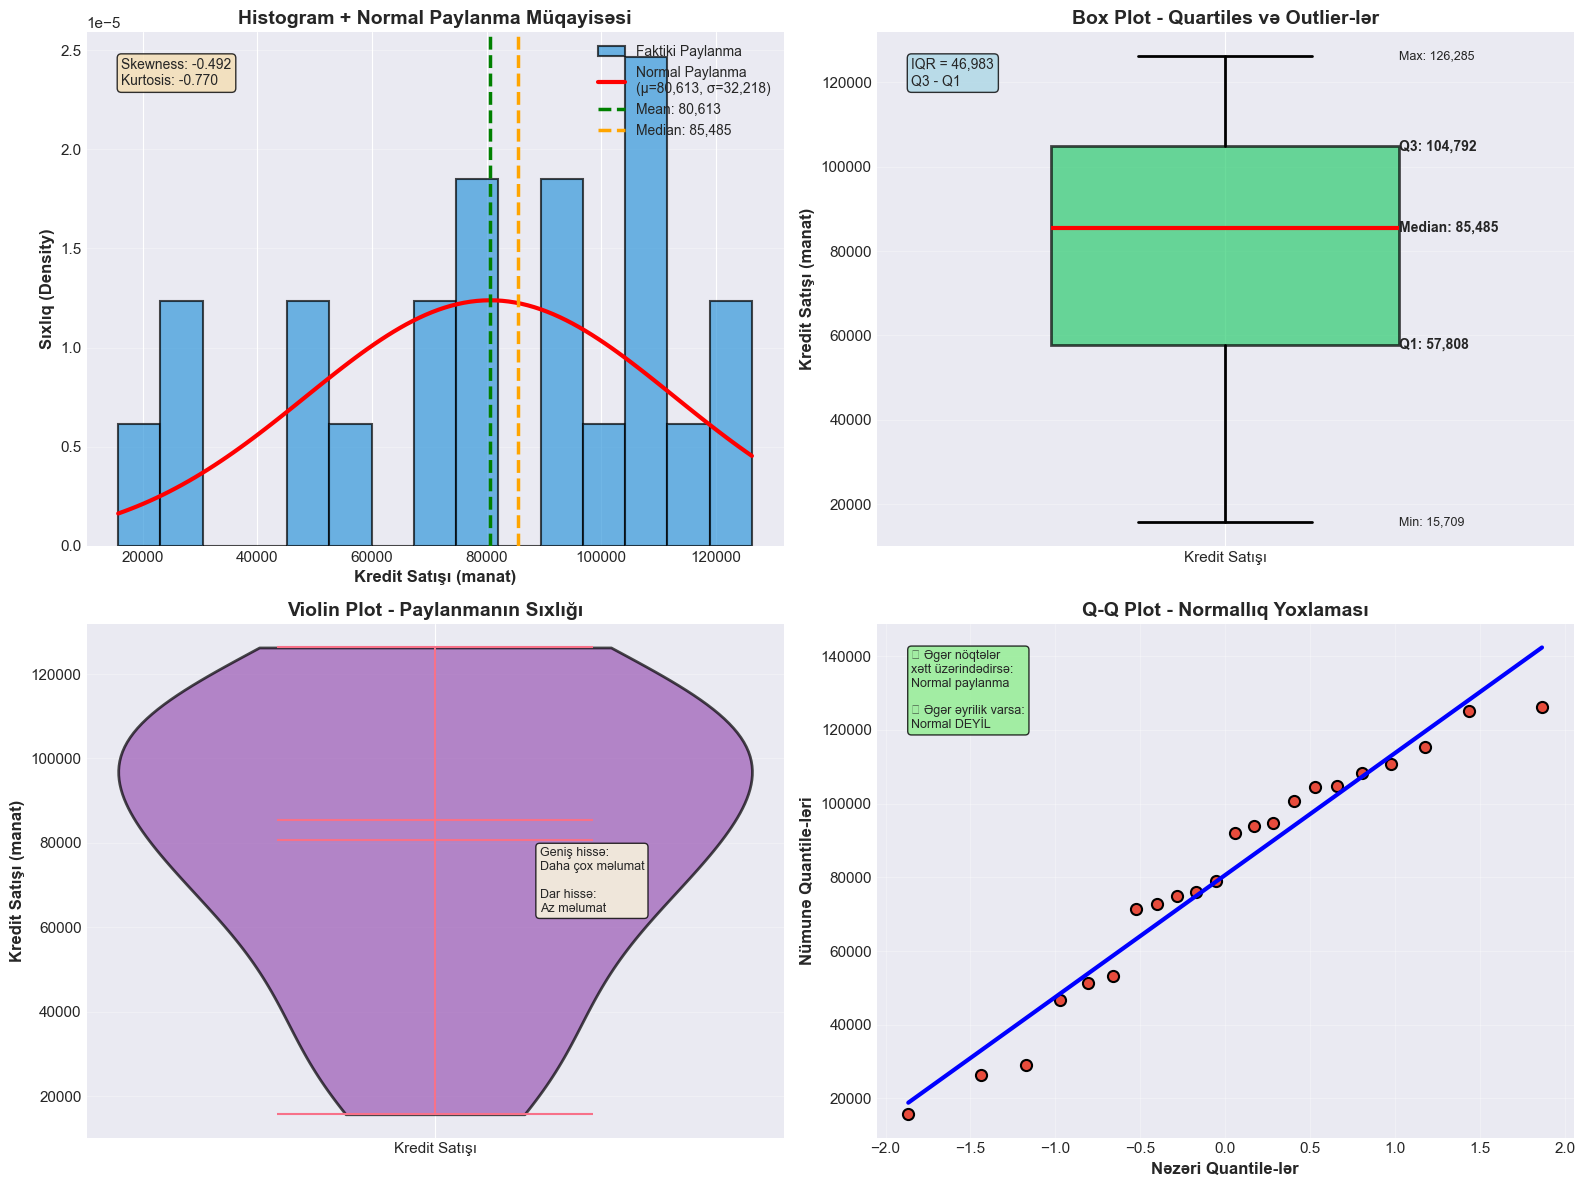


💡 QRAFİKLƏRİ NECƏ OXUMALI?

1️⃣  Histogram:
   • Zəng forması varsa → Normal paylanma
   • Qırmızı xətt (normal) və faktiki paylanmanı müqayisə edin
   • Mean və Median fərqi görünür

2️⃣  Box Plot:
   • Qutu: Q1-dən Q3-ə qədər (məlumatların orta 50%-i)
   • Qırmızı xətt: Median
   • Bığlar (whiskers): 1.5×IQR diapazonu
   • Qırmızı nöqtələr: Outlier-lər

3️⃣  Violin Plot:
   • Geniş hissə: Məlumatlar sıx (çox müşahidə)
   • Dar hissə: Məlumatlar seyrək (az müşahidə)
   • Simmetrik forma: Normal paylanmaya yaxın

4️⃣  Q-Q Plot:
   • Nöqtələr düz xətt üzərində → Mükəmməl normal paylanma
   • S-şəkilli əyrilik → Skewed (əyilmiş)
   • Quyruqlarda sapma → Ağır quyruqlar (kurtosis)


In [8]:
# 4 panel vizualizasiya
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram + Normal Paylanma
ax1 = axes[0, 0]
ax1.hist(y, bins=15, density=True, alpha=0.7, color='#3498DB', 
        edgecolor='black', linewidth=1.5, label='Faktiki Paylanma')

# Normal paylanma əyrisini əlavə edək
mu, sigma = y.mean(), y.std()
x_norm = np.linspace(y.min(), y.max(), 100)
ax1.plot(x_norm, stats.norm.pdf(x_norm, mu, sigma), 
        'r-', linewidth=3, label=f'Normal Paylanma\n(μ={mu:,.0f}, σ={sigma:,.0f})')

# Mean və Median xətləri
ax1.axvline(mean_val, color='green', linestyle='--', linewidth=2.5, label=f'Mean: {mean_val:,.0f}')
ax1.axvline(median_val, color='orange', linestyle='--', linewidth=2.5, label=f'Median: {median_val:,.0f}')

ax1.set_xlabel('Kredit Satışı (manat)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Sıxlıq (Density)', fontsize=12, fontweight='bold')
ax1.set_title('Histogram + Normal Paylanma Müqayisəsi', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10, loc='best')
ax1.grid(True, alpha=0.3, axis='y')

# Skewness məlumatı
skew_text = f'Skewness: {skewness:.3f}\nKurtosis: {fisher_kurt:.3f}'
ax1.text(0.05, 0.95, skew_text, transform=ax1.transAxes,
        fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 2. Box Plot
ax2 = axes[0, 1]
bp = ax2.boxplot([y], vert=True, patch_artist=True, widths=0.5,
                 boxprops=dict(facecolor='#2ECC71', alpha=0.7, edgecolor='black', linewidth=2),
                 whiskerprops=dict(color='black', linewidth=2),
                 capprops=dict(color='black', linewidth=2),
                 medianprops=dict(color='red', linewidth=3),
                 flierprops=dict(marker='o', markerfacecolor='red', markersize=10, 
                               markeredgecolor='black', markeredgewidth=1.5))

# Annotasiyalar
ax2.text(1.25, q1, f'Q1: {q1:,.0f}', fontsize=10, fontweight='bold', va='center')
ax2.text(1.25, median_val, f'Median: {median_val:,.0f}', fontsize=10, fontweight='bold', va='center')
ax2.text(1.25, q3, f'Q3: {q3:,.0f}', fontsize=10, fontweight='bold', va='center')
ax2.text(1.25, min_val, f'Min: {min_val:,.0f}', fontsize=9, va='center')
ax2.text(1.25, max_val, f'Max: {max_val:,.0f}', fontsize=9, va='center')

ax2.set_ylabel('Kredit Satışı (manat)', fontsize=12, fontweight='bold')
ax2.set_title('Box Plot - Quartiles və Outlier-lər', fontsize=14, fontweight='bold')
ax2.set_xticks([1])
ax2.set_xticklabels(['Kredit Satışı'])
ax2.grid(True, alpha=0.3, axis='y')

# IQR məlumatı
iqr_text = f'IQR = {iqr:,.0f}\nQ3 - Q1'
ax2.text(0.05, 0.95, iqr_text, transform=ax2.transAxes,
        fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# 3. Violin Plot
ax3 = axes[1, 0]
parts = ax3.violinplot([y], vert=True, widths=0.7, showmeans=True, showmedians=True)

# Rənglər
for pc in parts['bodies']:
    pc.set_facecolor('#9B59B6')
    pc.set_alpha(0.7)
    pc.set_edgecolor('black')
    pc.set_linewidth(2)

ax3.set_ylabel('Kredit Satışı (manat)', fontsize=12, fontweight='bold')
ax3.set_title('Violin Plot - Paylanmanın Sıxlığı', fontsize=14, fontweight='bold')
ax3.set_xticks([1])
ax3.set_xticklabels(['Kredit Satışı'])
ax3.grid(True, alpha=0.3, axis='y')

# İzah
violin_text = 'Geniş hissə:\nDaha çox məlumat\n\nDar hissə:\nAz məlumat'
ax3.text(0.65, 0.50, violin_text, transform=ax3.transAxes,
        fontsize=9, verticalalignment='center',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

# 4. Q-Q Plot (Quantile-Quantile)
ax4 = axes[1, 1]
stats.probplot(y, dist="norm", plot=ax4)
ax4.get_lines()[0].set_marker('o')
ax4.get_lines()[0].set_markersize(8)
ax4.get_lines()[0].set_markerfacecolor('#E74C3C')
ax4.get_lines()[0].set_markeredgecolor('black')
ax4.get_lines()[0].set_markeredgewidth(1.5)
ax4.get_lines()[1].set_linewidth(3)
ax4.get_lines()[1].set_color('blue')

ax4.set_title('Q-Q Plot - Normallıq Yoxlaması', fontsize=14, fontweight='bold')
ax4.set_xlabel('Nəzəri Quantile-lər', fontsize=12, fontweight='bold')
ax4.set_ylabel('Nümunə Quantile-ləri', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)

# Q-Q Plot izahı
qq_text = '📌 Əgər nöqtələr\nxətt üzərindədirsə:\nNormal paylanma\n\n📌 Əgər əyrilik varsa:\nNormal DEYİL'
ax4.text(0.05, 0.95, qq_text, transform=ax4.transAxes,
        fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n💡 QRAFİKLƏRİ NECƏ OXUMALI?")
print("=" * 90)
print("\n1️⃣  Histogram:")
print("   • Zəng forması varsa → Normal paylanma")
print("   • Qırmızı xətt (normal) və faktiki paylanmanı müqayisə edin")
print("   • Mean və Median fərqi görünür")

print("\n2️⃣  Box Plot:")
print("   • Qutu: Q1-dən Q3-ə qədər (məlumatların orta 50%-i)")
print("   • Qırmızı xətt: Median")
print("   • Bığlar (whiskers): 1.5×IQR diapazonu")
print("   • Qırmızı nöqtələr: Outlier-lər")

print("\n3️⃣  Violin Plot:")
print("   • Geniş hissə: Məlumatlar sıx (çox müşahidə)")
print("   • Dar hissə: Məlumatlar seyrək (az müşahidə)")
print("   • Simmetrik forma: Normal paylanmaya yaxın")

print("\n4️⃣  Q-Q Plot:")
print("   • Nöqtələr düz xətt üzərində → Mükəmməl normal paylanma")
print("   • S-şəkilli əyrilik → Skewed (əyilmiş)")
print("   • Quyruqlarda sapma → Ağır quyruqlar (kurtosis)")

---

# Bölüm 7️⃣: Outlier (Kənar Dəyər) Təhlili

## Outlier nədir?

**Outlier** = Digər məlumatlardan **çox fərqli** olan müşahidə

### Outlier-lər niyə yaranır?

1. **Təbii dəyişiklik**: Həqiqi hadisə (məs. COVİD-19 təsiri)
2. **Ölçmə xətası**: Səhv daxil edilmiş məlumat
3. **Məlumat daxil etmə xətası**: 100,000 əvəzinə 1,000,000 yazılıb

### Outlier-ləri necə aşkar edirik?

#### 1. IQR Metodu (Interquartile Range)

**Formul:**
```
Lower Fence = Q1 - 1.5 × IQR
Upper Fence = Q3 + 1.5 × IQR
```

**Outlier:** Bu sərhədlərdən kənar olan dəyərlər

**Üstünlükləri:**
- ✅ Sadədir
- ✅ Median-a əsaslanır (robust)
- ✅ Box plot-da vizual olaraq görünür

**Çatışmazlıqları:**
- ❌ 1.5 katsayısı ixtiyaridir
- ❌ Multivariate outlier-ləri tutmur

#### 2. Z-Score Metodu

**Formul:**
```
Z = (X - μ) / σ
```

**Outlier:** |Z| > 3 (və ya 2.5)

**Mənası:** Dəyər ortalamadan 3 standart sapma uzaqdadır

**Üstünlükləri:**
- ✅ Statistik əsası var
- ✅ Normal paylanma üçün yaxşıdır
- ✅ Quantitative qiymət verir

**Çatışmazlıqları:**
- ❌ Normal paylanma fərz edir
- ❌ Outlier-lərə həssasdır (ortalama və std-ni dəyişir)

### Outlier-lərlə nə etməli?

1. **Araşdır**: Səbəbini başa düş
2. **Yoxla**: Məlumat xətasımı?
3. **Qərar ver**:
   - Silib (legitimate olmayan xəta)
   - Saxla (həqiqi hadisə)
   - Transform et (log, winsorize)
   - Ayrıca təhlil et

🔍 OUTLIER (KƏNAR DƏYƏR) TƏHLİLİ

📊 1. IQR METODU (Interquartile Range)
------------------------------------------------------------------------------------------

  📐 Hesablamalar:
     Q1 (25%):                 57,808.22
     Q3 (75%):                104,791.65
     IQR (Q3 - Q1):            46,983.43
     1.5 × IQR:                70,475.14

  🚧 Sərhədlər:
     Aşağı sərhəd:            -12,666.92  (Q1 - 1.5×IQR)
     Yuxarı sərhəd:           175,266.78  (Q3 + 1.5×IQR)

  📍 Nəticə:
     Tapılan outlier sayı: 0
     ✅ IQR metoduna görə outlier tapılmadı


📊 2. Z-SCORE METODU
------------------------------------------------------------------------------------------

  📐 Metodologiya:
     Z-Score = (X - Mean) / Std
     Sərhəd: |Z| > 3
     Mənası: Ortalamadan 3σ-dan çox uzaq

  📍 Nəticə:
     Tapılan outlier sayı: 0
     ✅ Z-score metoduna görə outlier tapılmadı


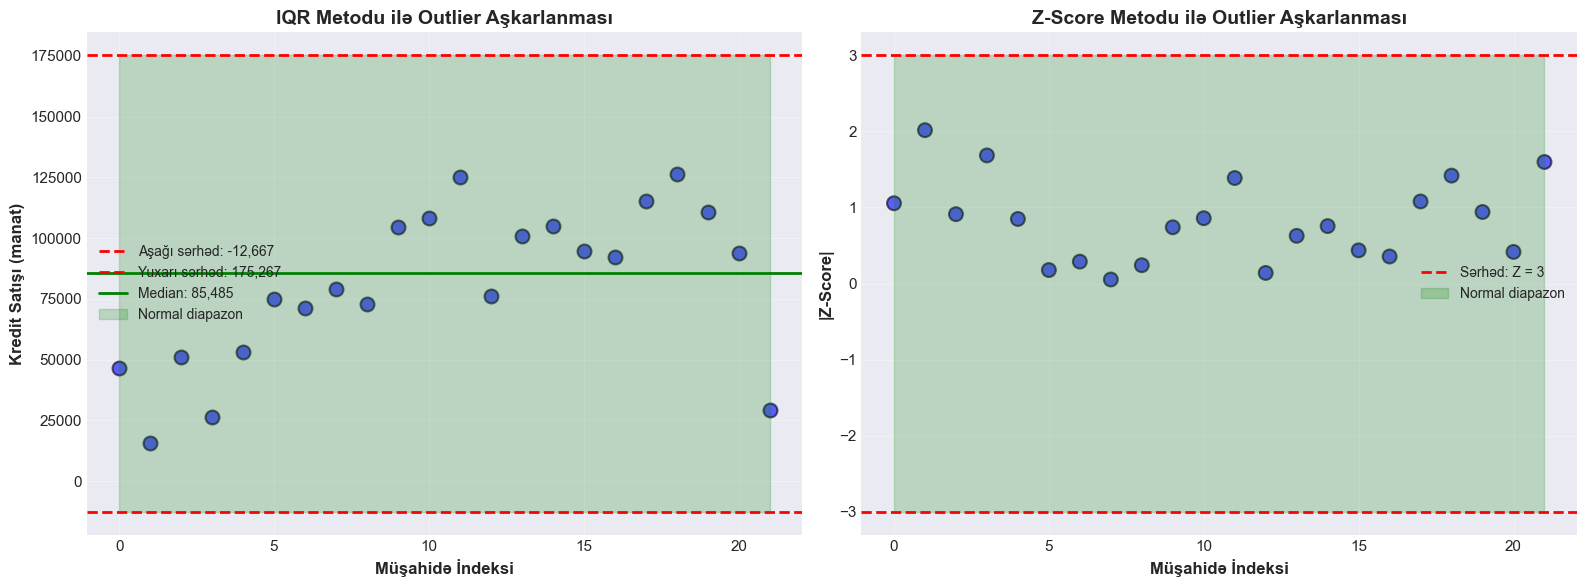



💡 OUTLIER-LƏRLƏ NƏ ETMƏK LAZIMDIR?

1️⃣  ARAŞDIR: Outlier-in səbəbini başa düş
   • Məlumat xətasımı? (daxil edilmə səhvi)
   • Ölçmə xətasımı? (sensor problemi)
   • Həqiqi hadisəmi? (COVİD, maliyyə böhranı)

2️⃣  YOXLA: Kontekstə bax
   • Həmin dövrdə nə baş verdi?
   • Digər dəyişənlərdə də anomaliya varmı?
   • Mənbə məlumatı yoxla

3️⃣  QƏRAR VER: Strategiya seç

   🔹 Silib (Removal):
      • Yalnız məlumat xətası olarsa
      • Ehtiyatlı ol! Mühüm informasiya itə bilər

   🔹 Saxla (Keep):
      • Həqiqi hadisədirsə
      • Modelləşdirmədə robust metodlar istifadə et

   🔹 Transform et (Transform):
      • Log transformasiya: log(X)
      • Winsorization: Kənar dəyərləri sərhədlə əvəz et
      • Capping: Min/max sərhədləri qoy

   🔹 Ayrıca təhlil et (Separate Analysis):
      • İki model qur: outlier-li və outlier-siz
      • Müqayisə et və fərqi başa düş



In [9]:
print("=" * 90)
print("🔍 OUTLIER (KƏNAR DƏYƏR) TƏHLİLİ")
print("=" * 90)

# IQR Metodu
print("\n📊 1. IQR METODU (Interquartile Range)")
print("-" * 90)

q1_val = y.quantile(0.25)
q3_val = y.quantile(0.75)
iqr_val = q3_val - q1_val
lower_fence = q1_val - 1.5 * iqr_val
upper_fence = q3_val + 1.5 * iqr_val

print(f"\n  📐 Hesablamalar:")
print(f"     Q1 (25%):              {q1_val:>12,.2f}")
print(f"     Q3 (75%):              {q3_val:>12,.2f}")
print(f"     IQR (Q3 - Q1):         {iqr_val:>12,.2f}")
print(f"     1.5 × IQR:             {1.5*iqr_val:>12,.2f}")
print(f"\n  🚧 Sərhədlər:")
print(f"     Aşağı sərhəd:          {lower_fence:>12,.2f}  (Q1 - 1.5×IQR)")
print(f"     Yuxarı sərhəd:         {upper_fence:>12,.2f}  (Q3 + 1.5×IQR)")

# Outlier-ləri tap
outliers_iqr = y[(y < lower_fence) | (y > upper_fence)]
outlier_indices_iqr = outliers_iqr.index.tolist()

print(f"\n  📍 Nəticə:")
print(f"     Tapılan outlier sayı: {len(outliers_iqr)}")
if len(outliers_iqr) > 0:
    print(f"\n     Outlier dəyərlər:")
    for idx in outlier_indices_iqr:
        val = y[idx]
        period = df.loc[idx, 'Rüblər']
        position = "yuxarı" if val > upper_fence else "aşağı"
        print(f"       • {period}: {val:>12,.2f} manat ({position} sərhəddən kənar)")
else:
    print(f"     ✅ IQR metoduna görə outlier tapılmadı")

# Z-Score Metodu
print("\n\n📊 2. Z-SCORE METODU")
print("-" * 90)

z_scores = np.abs((y - y.mean()) / y.std())
threshold = 3

print(f"\n  📐 Metodologiya:")
print(f"     Z-Score = (X - Mean) / Std")
print(f"     Sərhəd: |Z| > {threshold}")
print(f"     Mənası: Ortalamadan {threshold}σ-dan çox uzaq")

# Outlier-ləri tap
outliers_z = y[z_scores > threshold]
outlier_indices_z = outliers_z.index.tolist()

print(f"\n  📍 Nəticə:")
print(f"     Tapılan outlier sayı: {len(outliers_z)}")
if len(outliers_z) > 0:
    print(f"\n     Outlier dəyərlər:")
    for idx in outlier_indices_z:
        val = y[idx]
        z_val = z_scores[idx]
        period = df.loc[idx, 'Rüblər']
        print(f"       • {period}: {val:>12,.2f} manat (Z-score: {z_val:.2f})")
else:
    print(f"     ✅ Z-score metoduna görə outlier tapılmadı")

# Vizualizasiya
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sol: IQR metodu
ax1 = axes[0]
ax1.scatter(range(len(y)), y, s=100, alpha=0.6, c='blue', edgecolors='black', linewidth=1.5)

# Sərhədlər
ax1.axhline(lower_fence, color='red', linestyle='--', linewidth=2, label=f'Aşağı sərhəd: {lower_fence:,.0f}')
ax1.axhline(upper_fence, color='red', linestyle='--', linewidth=2, label=f'Yuxarı sərhəd: {upper_fence:,.0f}')
ax1.axhline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:,.0f}')

# Normal diapazon
ax1.fill_between(range(len(y)), lower_fence, upper_fence, alpha=0.2, color='green', label='Normal diapazon')

# Outlier-ləri vurğula
if len(outliers_iqr) > 0:
    ax1.scatter(outlier_indices_iqr, outliers_iqr, s=200, c='red', marker='X', 
               edgecolors='black', linewidth=2, label='Outlier-lər', zorder=10)

ax1.set_xlabel('Müşahidə İndeksi', fontsize=12, fontweight='bold')
ax1.set_ylabel('Kredit Satışı (manat)', fontsize=12, fontweight='bold')
ax1.set_title('IQR Metodu ilə Outlier Aşkarlanması', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10, loc='best')
ax1.grid(True, alpha=0.3)

# Sağ: Z-score metodu
ax2 = axes[1]
colors = ['red' if z > threshold else 'blue' for z in z_scores]
ax2.scatter(range(len(y)), z_scores, s=100, alpha=0.6, c=colors, edgecolors='black', linewidth=1.5)

# Sərhəd
ax2.axhline(threshold, color='red', linestyle='--', linewidth=2, label=f'Sərhəd: Z = {threshold}')
ax2.axhline(-threshold, color='red', linestyle='--', linewidth=2)
ax2.fill_between(range(len(y)), -threshold, threshold, alpha=0.2, color='green', label='Normal diapazon')

ax2.set_xlabel('Müşahidə İndeksi', fontsize=12, fontweight='bold')
ax2.set_ylabel('|Z-Score|', fontsize=12, fontweight='bold')
ax2.set_title('Z-Score Metodu ilə Outlier Aşkarlanması', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10, loc='best')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n\n💡 OUTLIER-LƏRLƏ NƏ ETMƏK LAZIMDIR?")
print("=" * 90)
print("\n1️⃣  ARAŞDIR: Outlier-in səbəbini başa düş")
print("   • Məlumat xətasımı? (daxil edilmə səhvi)")
print("   • Ölçmə xətasımı? (sensor problemi)")
print("   • Həqiqi hadisəmi? (COVİD, maliyyə böhranı)")

print("\n2️⃣  YOXLA: Kontekstə bax")
print("   • Həmin dövrdə nə baş verdi?")
print("   • Digər dəyişənlərdə də anomaliya varmı?")
print("   • Mənbə məlumatı yoxla")

print("\n3️⃣  QƏRAR VER: Strategiya seç")
print("\n   🔹 Silib (Removal):")
print("      • Yalnız məlumat xətası olarsa")
print("      • Ehtiyatlı ol! Mühüm informasiya itə bilər")

print("\n   🔹 Saxla (Keep):")
print("      • Həqiqi hadisədirsə")
print("      • Modelləşdirmədə robust metodlar istifadə et")

print("\n   🔹 Transform et (Transform):")
print("      • Log transformasiya: log(X)")
print("      • Winsorization: Kənar dəyərləri sərhədlə əvəz et")
print("      • Capping: Min/max sərhədləri qoy")

print("\n   🔹 Ayrıca təhlil et (Separate Analysis):")
print("      • İki model qur: outlier-li və outlier-siz")
print("      • Müqayisə et və fərqi başa düş")

print("\n" + "=" * 90)

---

## 🎓 Bu bölümdə nələr öyrəndik?

✅ **Məlumat strukturu**: Ölçü, növlər, boş dəyərlər

✅ **Təsviri statistika**: Mean, Median, Std, Quartiles, CV

✅ **Paylanma**: Skewness, Kurtosis, Normallıq testləri

✅ **Vizuallaşdırma**: Histogram, Box plot, Violin plot, Q-Q plot

✅ **Outlier təhlili**: IQR və Z-score metodları

**Növbəti hissədə:** Dəyişənlər arası əlaqələr, korrelyasiya, zaman seriyası təhlili!

---